In [78]:
from optimize import *
import pandas as pd
from tqdm.notebook import tqdm

## Calculate Metrics

In [79]:
seed_metadata = pd.read_csv("Optimizations-Desktop-Tetris/seed-metadata.csv")

In [80]:
data_dir = 'Optimizations-Desktop-Tetris/Optimizations-Tetris-32/'
init_mask_file = 'Initial_mask.txt'
final_mask_file = 'final_mask.txt'
final_data_file = 'final_data.npy'

metric_tester = OptimizerClass(initialize = False)
metric_tester.plots_dir = 'Optimizations-Desktop-Tetris/Plots/'

In [97]:
cc_initial, cc_final = [[], [], [], []], [[], [], [], []]
sens_initial, sens_final = [[], [], [], []], [[], [], [], []]
flat_initial, flat_final = [[], [], [], []], [[], [], [], []]

# Insert for loop here
for i in tqdm(range(seed_metadata.shape[0]), desc='Calculating metrics'):
    i_mask_size = seed_metadata.iloc[[i]]['Mask Size'].item()
    i_open_frac = seed_metadata.iloc[[i]]['Open Fraction'].item()
    i_magnification = seed_metadata.iloc[[i]]['Magnification'].item()
    i_seed_num = seed_metadata.iloc[[i]]['Seed #'].item()
    i_hole_size_lim = seed_metadata.iloc[[i]]['Hole Size Limit'].item()
    i_cross_corr_w = float(seed_metadata.iloc[[i]]['Cross-Corr Weight'].item())
    i_sens_w = float(seed_metadata.iloc[[i]]['Sensitivity Weight'].item())
    i_flat_w = float(seed_metadata.iloc[[i]]['Flat Weight'].item())
    i_tetris_frac = float(seed_metadata.iloc[[i]]['Tetris Fraction'].item())

    seed_dir = "GD_ms_{}-of_{}-mag_{}-seed_{}-hl_{}-cw_{}-sw_{}-ft_{}/".format(
        i_mask_size, int(str(i_open_frac).split('.')[1]),
        i_magnification, i_seed_num, i_hole_size_lim, i_cross_corr_w, i_sens_w, i_tetris_frac)

    init_mask_fn = data_dir + seed_dir + init_mask_file
    final_mask_fn = data_dir + seed_dir + final_mask_file
    final_data_fn = data_dir + seed_dir + final_data_file

    metric_tester.open_frac = i_open_frac

    for mag in range(1, 5):
        if mag == 1:
            metric_tester.magnification = 1.5
        else:
            metric_tester.magnification = mag
        metric_tester.remagnify()

        metric_tester.mask = np.loadtxt(init_mask_fn)
        # test_init = metric_tester.CalculateMetric(metric_tester.mask, return_F=True)
        i_init_met = metric_tester.CalculateMetric(metric_tester.mask)

        metric_tester.mask = np.loadtxt(final_mask_fn)
        # test_final = metric_tester.CalculateMetric(metric_tester.mask, return_F=True)
        i_final_met = metric_tester.CalculateMetric(metric_tester.mask)

        cc_initial[mag-1].append(i_init_met[0])
        cc_final[mag-1].append(i_final_met[0])

        sens_initial[mag-1].append(i_init_met[1])
        sens_final[mag-1].append(i_final_met[1])
        
        flat_initial[mag-1].append(i_init_met[2])
        flat_final[mag-1].append(i_final_met[2])
cc_initial = np.array(cc_initial)
cc_final = np.array(cc_final)
sens_initial = np.array(sens_initial)
sens_final = np.array(sens_final)
flat_initial = np.array(flat_initial)
flat_final = np.array(flat_final)
print("Completed metric calculations")

seed_metadata['Cross Corr Metric 1.5i'] = cc_initial[0]
seed_metadata['Cross Corr Metric 1.5f'] = cc_final[0]
seed_metadata['Sensitivity Metric 1.5i'] = sens_initial[0]
seed_metadata['Sensitivity Metric 1.5f'] = sens_final[0]
seed_metadata['Flat Metric 1.5i'] = flat_initial[0]
seed_metadata['Flat Metric 1.5f'] = flat_final[0]

seed_metadata['Cross Corr Metric 2i'] = cc_initial[1]
seed_metadata['Cross Corr Metric 2f'] = cc_final[1]
seed_metadata['Sensitivity Metric 2i'] = sens_initial[1]
seed_metadata['Sensitivity Metric 2f'] = sens_final[1]
seed_metadata['Flat Metric 2i'] = flat_initial[1]
seed_metadata['Flat Metric 2f'] = flat_final[1]

seed_metadata['Cross Corr Metric 3i'] = cc_initial[2]
seed_metadata['Cross Corr Metric 3f'] = cc_final[2]
seed_metadata['Sensitivity Metric 3i'] = sens_initial[2]
seed_metadata['Sensitivity Metric 3f'] = sens_final[2]
seed_metadata['Flat Metric 3i'] = flat_initial[2]
seed_metadata['Flat Metric 3f'] = flat_final[2]

seed_metadata['Cross Corr Metric 4i'] = cc_initial[3]
seed_metadata['Cross Corr Metric 4f'] = cc_final[3]
seed_metadata['Sensitivity Metric 4i'] = sens_initial[3]
seed_metadata['Sensitivity Metric 4f'] = sens_final[3]
seed_metadata['Flat Metric 4i'] = flat_initial[3]
seed_metadata['Flat Metric 4f'] = flat_final[3]

seed_metadata['Total Metric 1.5i'] = cc_initial[0] + sens_initial[0] + flat_initial[0]
seed_metadata['Total Metric 1.5f'] = cc_final[0] + sens_final[0] + flat_final[0]

seed_metadata['Total Metric 2i'] = cc_initial[1] + sens_initial[1] + flat_initial[1]
seed_metadata['Total Metric 2f'] = cc_final[1] + sens_final[1] + flat_final[1]

seed_metadata['Total Metric 3i'] = cc_initial[2] + sens_initial[2] + flat_initial[2]
seed_metadata['Total Metric 3f'] = cc_final[2] + sens_final[2] + flat_final[2]

seed_metadata['Total Metric 4i'] = cc_initial[3] + sens_initial[3] + flat_initial[3]
seed_metadata['Total Metric 4f'] = cc_final[3] + sens_final[3] + flat_final[3]

seed_metadata.to_csv('seed-metadata-with-results.csv', index=False)
print("Saved to output file")

Calculating metrics:   0%|          | 0/126 [00:00<?, ?it/s]

Completed metric calculations
Saved to output file


In [96]:
np.array(cc_initial)[0].shape

(126,)

## Plotting Metrics

In [98]:
results = pd.read_csv('Optimizations-Desktop-Tetris/Optimizations-Tetris-32/seed-metadata-with-results.csv')

In [99]:
results[results['Seed #'] == 44]

,Seed #,Mask Size,Open Fraction,Magnification,Hole Size Limit,Cross-Corr Weight,Sensitivity Weight,Flat Weight,Tetris Fraction,Date Started,...,Flat Metric 4i,Flat Metric 4f,Total Metric 1.5i,Total Metric 1.5f,Total Metric 2i,Total Metric 2f,Total Metric 3i,Total Metric 3f,Total Metric 4i,Total Metric 4f
43,44,46,0.3,4,80,1,2,2,0.4,3/1/24,...,0.19125,0.113125,65.731603,7.250953,40.911149,2.449964,16.653089,4.468949,11.205254,1.008643


In [100]:
results[(results['Open Fraction'] == 0.5) & 
          (results['Sensitivity Weight'] == 1) & 
          (results['Magnification'] == 4)]

,Seed #,Mask Size,Open Fraction,Magnification,Hole Size Limit,Cross-Corr Weight,Sensitivity Weight,Flat Weight,Tetris Fraction,Date Started,...,Flat Metric 4i,Flat Metric 4f,Total Metric 1.5i,Total Metric 1.5f,Total Metric 2i,Total Metric 2f,Total Metric 3i,Total Metric 3f,Total Metric 4i,Total Metric 4f
12,13,46,0.5,4,80,1,1,2,0.4,2/26/24,...,0.250000,0.171875,116.036311,14.322286,78.374468,8.935291,31.174393,7.508131,20.938903,3.427620
13,14,46,0.5,4,80,1,1,2,0.4,2/25/24,...,0.343750,0.171875,148.160652,15.119626,113.276677,7.606502,45.154865,6.504836,31.680213,3.440354
14,15,46,0.5,4,80,1,1,2,0.4,2/25/24,...,0.312500,0.171875,257.825175,14.135497,133.075916,8.782629,41.654869,7.018909,26.322277,3.585277
33,34,46,0.5,4,80,2,1,2,0.4,2/29/24,...,0.312500,0.171875,103.666801,14.506696,77.948530,8.194367,36.618719,6.600736,27.296886,3.321892
34,35,46,0.5,4,80,2,1,2,0.4,2/29/24,...,0.375000,0.171875,62.764398,15.982838,48.921859,6.321512,27.289745,6.183612,21.258202,3.377404
35,36,46,0.5,4,80,2,1,2,0.4,2/29/24,...,0.328125,0.171875,128.915392,21.943725,84.080813,8.458860,33.652522,7.380778,22.802037,3.462979
75,76,46,0.5,4,80,1,1,2,0.6,3/6/24,...,0.312500,0.171875,83.305577,17.968753,68.024044,10.072335,28.092358,7.243883,22.363333,4.701162
76,77,46,0.5,4,80,1,1,2,0.6,3/8/24,...,0.312500,0.171875,35.170380,9.825785,33.745562,8.391506,19.771767,5.558398,17.805604,3.430917
77,78,46,0.5,4,80,1,1,2,0.6,3/6/24,...,0.359375,0.171875,137.806567,20.094424,89.218025,8.038618,43.048842,7.821837,30.579250,3.872285
96,97,46,0.5,4,80,2,1,2,0.6,3/10/24,...,0.390625,0.171875,82.533465,18.701627,54.456501,5.968097,28.906604,6.907667,23.583438,2.966310


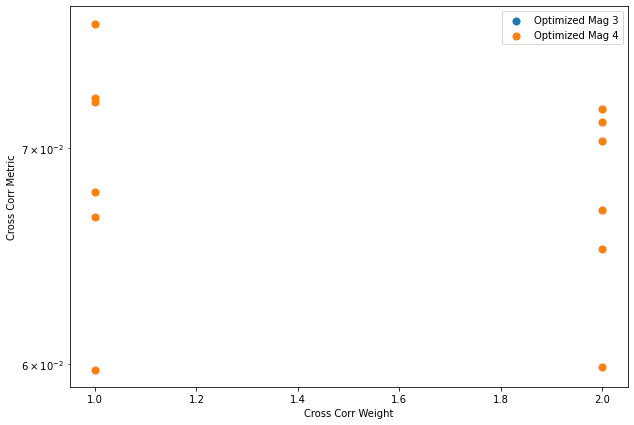

In [102]:
temp_result = results[(results['Open Fraction'] == 0.5) & 
          (results['Sensitivity Weight'] == 1) & 
          (results['Magnification'] == 3)]

plt.figure(figsize=(10,7), facecolor='white')
plt.scatter(temp_result['Cross-Corr Weight'], temp_result['Cross Corr Metric 3f'], s=50,
           label='Optimized Mag 3')

temp_result = results[(results['Open Fraction'] == 0.5) & 
          (results['Sensitivity Weight'] == 1) & 
          (results['Magnification'] == 4)]
plt.scatter(temp_result['Cross-Corr Weight'], temp_result['Cross Corr Metric 3f'], s=50,
           label='Optimized Mag 4')
plt.semilogy()
plt.legend()
plt.xlabel('Cross Corr Weight')
plt.ylabel('Cross Corr Metric')
plt.show()

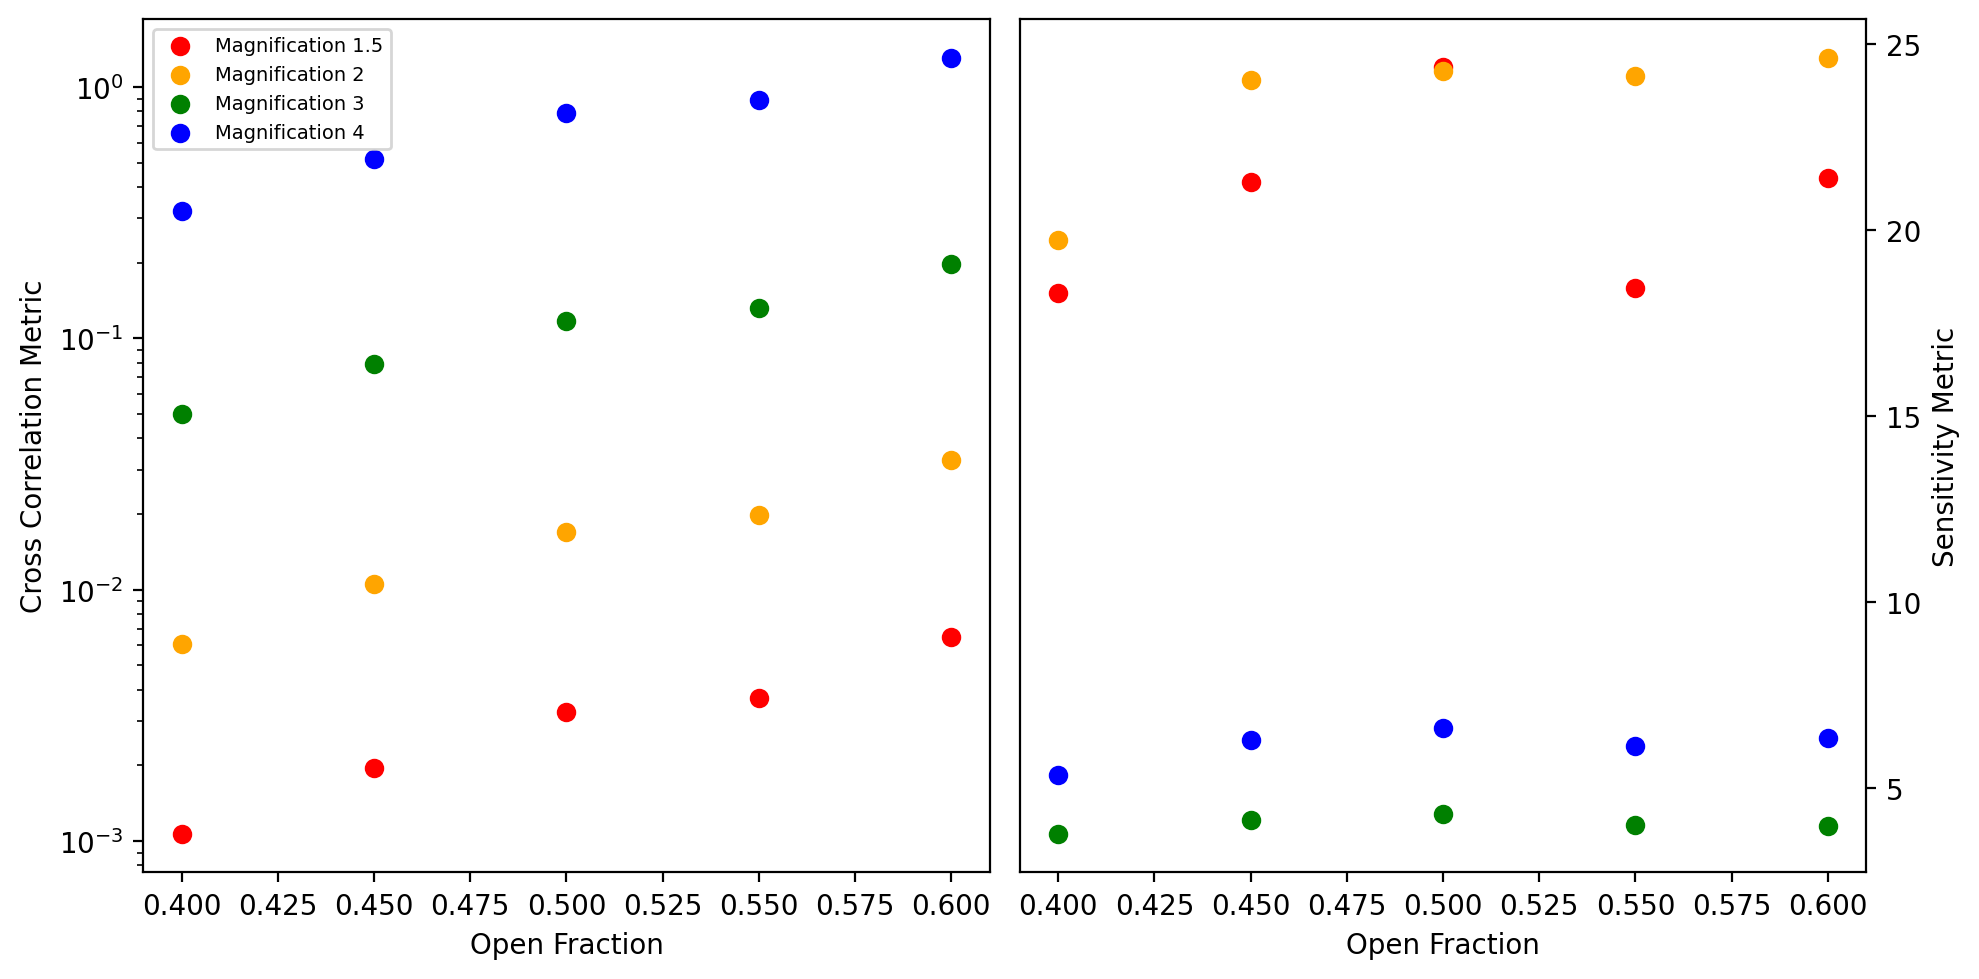

In [95]:
ofs = [0.4, 0.45, 0.5, 0.55, 0.6]
sw = 1

fig, [ax1, ax2] = plt.subplots(1,2,figsize=(10,5), dpi=200, facecolor='white')
for i, of in enumerate(ofs):
    temp_result = results[(results['Open Fraction'] == of) & 
                          (results['Sensitivity Weight'] == sw) & 
                          (results['Magnification'] == 3)]
    if i == 0:
        ax1.scatter(of, temp_result['Cross Corr Metric 1.5f'].values.mean(), color='red', label='Magnification 1.5')
        ax1.scatter(of, temp_result['Cross Corr Metric 2f'].values.mean(), color='orange', label='Magnification 2')
        ax1.scatter(of, temp_result['Cross Corr Metric 3f'].values.mean(), color='green', label='Magnification 3')
        ax1.scatter(of, temp_result['Cross Corr Metric 4f'].values.mean(), color='blue', label='Magnification 4')
        
        ax2.scatter(of, temp_result['Sensitivity Metric 1.5f'].values.mean(), color='red', label='Magnification 1.5')
        ax2.scatter(of, temp_result['Sensitivity Metric 2f'].values.mean(), color='orange', label='Magnification 2')
        ax2.scatter(of, temp_result['Sensitivity Metric 3f'].values.mean(), color='green', label='Magnification 3')
        ax2.scatter(of, temp_result['Sensitivity Metric 4f'].values.mean(), color='blue', label='Magnification 4')
    else:
        ax1.scatter(of, temp_result['Cross Corr Metric 1.5f'].values.mean(), color='red')
        ax1.scatter(of, temp_result['Cross Corr Metric 2f'].values.mean(), color='orange')
        ax1.scatter(of, temp_result['Cross Corr Metric 3f'].values.mean(), color='green')
        ax1.scatter(of, temp_result['Cross Corr Metric 4f'].values.mean(), color='blue')
        
        ax2.scatter(of, temp_result['Sensitivity Metric 1.5f'].values.mean(), color='red')
        ax2.scatter(of, temp_result['Sensitivity Metric 2f'].values.mean(), color='orange')
        ax2.scatter(of, temp_result['Sensitivity Metric 3f'].values.mean(), color='green')
        ax2.scatter(of, temp_result['Sensitivity Metric 4f'].values.mean(), color='blue')
ax1.set_xlabel('Open Fraction')
ax1.set_ylabel('Cross Correlation Metric')
ax1.legend(fontsize=7)
ax1.semilogy()

ax2.set_xlabel('Open Fraction')
ax2.set_ylabel('Sensitivity Metric')
# ax2.legend(fontsize=7)
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
# ax2.semilogy()

plt.tight_layout()
plt.show()

In [116]:
metric_tester = OptimizerClass(initialize = False)
metric_tester.plots_dir = 'Optimizations-Desktop/Plots/'

In [171]:
seed_metadata

,Seed Index,Seed #,Mask Size,Open Fraction,Magnification,Hole Size Limit,Cross-Corr Weight,Sensitivity Weight,Stopping Iterations,Date Started,...,Sensitivity Metric 2i,Sensitivity Metric 2f,Cross Corr Metric 3i,Cross Corr Metric 3f,Sensitivity Metric 3i,Sensitivity Metric 3f,Cross Corr Metric 4i,Cross Corr Metric 4f,Sensitivity Metric 4i,Sensitivity Metric 4f
0,0,1000,46,0.50,3,50,1,2,100,9/29/23,...,21.042205,6.732474,0.021851,0.008770,13.651694,1.114005,0.283855,0.105117,11.936485,3.144171
1,1,1,46,0.40,3,17,2,1,150,9/29/23,...,20.979533,15.342468,0.012327,0.018650,11.803346,1.460326,0.116550,0.154992,8.406972,4.742183
2,2,2,46,0.40,3,17,2,1,150,9/29/23,...,17.266359,12.775563,0.012218,0.020338,11.816302,1.137960,0.125778,0.160335,9.114181,4.688452
3,3,3,46,0.40,3,17,2,1,150,9/29/23,...,19.125598,15.657809,0.013305,0.023567,12.787936,1.376982,0.116893,0.197814,8.461930,5.996577
4,4,4,46,0.45,3,30,2,1,150,9/29/23,...,31.004912,24.352707,0.023342,0.041632,18.076326,1.575058,0.201838,0.319712,11.226731,7.106158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206,206,101,46,0.55,4,107,10,1,150,10/29/23,...,21.122962,13.834136,0.020565,0.186127,10.386652,11.451981,0.209065,0.579197,7.612969,1.331939
207,207,102,46,0.55,4,107,10,1,150,10/30/23,...,37.748571,20.824173,0.036163,0.320257,18.420142,16.683081,0.302859,0.905174,10.744758,1.802194
208,208,103,46,0.60,4,300,10,1,150,10/30/23,...,12.186019,12.072857,0.024878,0.153283,11.156873,7.882993,0.246906,0.531141,7.671633,1.231480
209,209,104,46,0.60,4,300,10,1,150,10/30/23,...,21.498656,11.664367,0.029024,0.172459,13.382905,9.681626,0.251360,0.540662,8.127592,1.285992


In [18]:
seed_num = 119

i = seed_num - 1 # 113
i_mask_size = seed_metadata.iloc[[i]]['Mask Size'].item()
i_open_frac = seed_metadata.iloc[[i]]['Open Fraction'].item()
i_magnification = seed_metadata.iloc[[i]]['Magnification'].item()
i_seed_num = seed_metadata.iloc[[i]]['Seed #'].item()
i_hole_size_lim = seed_metadata.iloc[[i]]['Hole Size Limit'].item()
i_cross_corr_w = float(seed_metadata.iloc[[i]]['Cross-Corr Weight'].item())
i_sens_w = float(seed_metadata.iloc[[i]]['Sensitivity Weight'].item())
i_tetris_frac = float(seed_metadata.iloc[[i]]['Tetris Fraction'].item())

seed_dir = "GD_ms_{}-of_{}-mag_{}-seed_{}-hl_{}-cw_{}-sw_{}-ft_{}/".format(
        i_mask_size, int(str(i_open_frac).split('.')[1]),
        i_magnification, i_seed_num, i_hole_size_lim, i_cross_corr_w, i_sens_w, i_tetris_frac)

init_mask_fn = data_dir + seed_dir + init_mask_file
final_mask_fn = data_dir + seed_dir + final_mask_file

i_magnification = 4
metric_tester.magnification = i_magnification
metric_tester.remagnify()

metric_tester.mask = np.loadtxt(init_mask_fn)
test_init = metric_tester.CalculateMetric(metric_tester.mask, return_F=True)

metric_tester.mask = np.loadtxt(final_mask_fn)
test_final = metric_tester.CalculateMetric(metric_tester.mask, return_F=True)

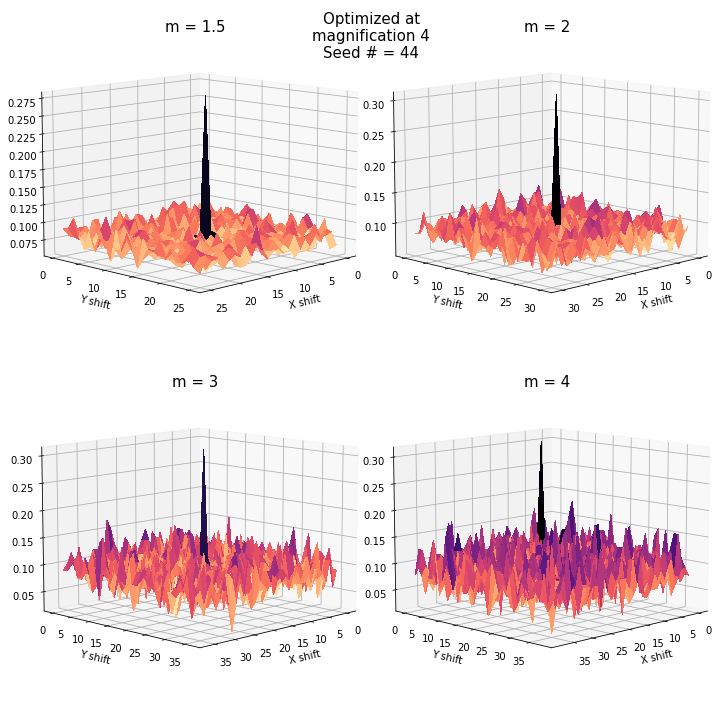

In [13]:
j = 0
cmap = 'magma_r'

fig, [[mag1ax, mag2ax], [mag3ax, mag4ax]] = plt.subplots(2, 2, figsize=(10,10), subplot_kw={"projection": "3d"}, facecolor='white')
axes = [mag1ax, mag2ax, mag3ax, mag4ax]
plt.tight_layout(pad=1)

for mag in range(1,5):
    if mag == 1:
        i_magnification = 1.5
    else:
        i_magnification = mag
    metric_tester.magnification = i_magnification
    metric_tester.remagnify()

    metric_tester.mask = np.loadtxt(final_mask_fn)
    test_mag = metric_tester.CalculateMetric(metric_tester.mask, return_F=True)
#     print(metric_tester.corr_size)
    j = ((metric_tester.corr_size)*(metric_tester.corr_size//2))-1+(metric_tester.corr_size//2)
    if mag == 4:
        j = ((metric_tester.corr_size)*(8))-1+12
    X = np.arange(metric_tester.corr_size)
    Y = np.arange(metric_tester.corr_size)
    X, Y = np.meshgrid(X, Y)
    Z = test_mag[j].reshape(metric_tester.corr_size,metric_tester.corr_size)
    surf = axes[mag-1].plot_surface(X, Y, Z, cmap=cmap, linewidth=0, antialiased=False)
    axes[mag-1].view_init(elev=10, azim=45)
    
    axes[mag-1].set_title('m = {}'.format(i_magnification), fontsize=15, y=0.99)
    
    axes[mag-1].set_ylabel('Y shift', fontsize=10)
    axes[mag-1].set_xlabel('X shift', fontsize=10)
fig.suptitle('Optimized at\nmagnification {}\nSeed # = {}'.format(
    seed_metadata.iloc[[i]]['Magnification'].item(), 
    seed_metadata.iloc[[i]]['Seed #'].item()), fontsize=15)
plt.show()

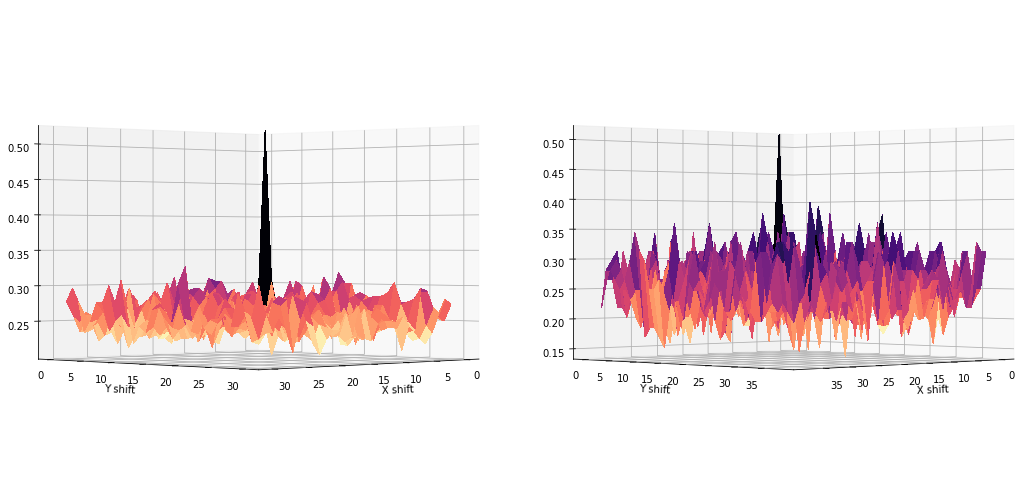

In [32]:
j = 0
cmap = 'magma_r'

fig, [mag1ax, mag2ax] = plt.subplots(1, 2, figsize=(15,7), subplot_kw={"projection": "3d"}, facecolor='white')
axes = [mag1ax, mag2ax]
plt.tight_layout(pad=1)

for aaxx, mag in enumerate([2, 4]):
    if mag == 1:
        i_magnification = 1.5
    else:
        i_magnification = mag
    metric_tester.magnification = i_magnification
    metric_tester.remagnify()

    metric_tester.mask = np.loadtxt(final_mask_fn)
    test_mag = metric_tester.CalculateMetric(metric_tester.mask, return_F=True)
#     print(metric_tester.corr_size)
    j = ((metric_tester.corr_size)*(metric_tester.corr_size//2))-1+(metric_tester.corr_size//2)
    if mag == 4:
        j = ((metric_tester.corr_size)*(8))-1+12
    X = np.arange(metric_tester.corr_size)
    Y = np.arange(metric_tester.corr_size)
    X, Y = np.meshgrid(X, Y)
    Z = test_mag[j].reshape(metric_tester.corr_size,metric_tester.corr_size)
    surf = axes[aaxx].plot_surface(X, Y, Z, cmap=cmap, linewidth=0, antialiased=False)
    axes[aaxx].view_init(elev=0, azim=45)
    
#     axes[aaxx].set_title('m = {}'.format(i_magnification), fontsize=15, y=0.99)
    
    axes[aaxx].set_ylabel('Y shift', fontsize=10)
    axes[aaxx].set_xlabel('X shift', fontsize=10)
# fig.suptitle('Optimized at\nmagnification {}\nSeed # = {}'.format(
#     seed_metadata.iloc[[i]]['Magnification'].item(), 
#     seed_metadata.iloc[[i]]['Seed #'].item()), fontsize=15)
plt.savefig('Plots/compare_2_4_ex.png', dpi=300, facecolor='white', bbox_inches='tight')
plt.show()

In [ ]:
j = 725

fig, [ax, aax] = plt.subplots(1, 2, figsize=(15,7), subplot_kw={"projection": "3d"}, facecolor='white')

X = np.arange(metric_tester.corr_size)
Y = np.arange(metric_tester.corr_size)
X, Y = np.meshgrid(X, Y)
Za = test_init[j].reshape(metric_tester.corr_size,metric_tester.corr_size)
Zaa = test_final[j].reshape(metric_tester.corr_size,metric_tester.corr_size)

cmap = 'magma_r'
surf = ax.plot_surface(X, Y, Za, cmap=cmap, linewidth=0, antialiased=False)
ax.view_init(elev=30, azim=45)

ax.set_title('Initial', fontsize=25)

surf = aax.plot_surface(X, Y, Zaa, cmap=cmap, linewidth=0, antialiased=False)
aax.view_init(elev=30, azim=45)

aax.set_title('Final', fontsize=25)

ax.set_ylabel('Y shift', fontsize=15)
ax.set_xlabel('X shift', fontsize=15)
aax.set_ylabel('Y shift', fontsize=15)
aax.set_xlabel('X shift', fontsize=15)

plt.tight_layout()

plt.suptitle('Magnification {}'.format(i_magnification), fontsize=30)
# plt.colorbar(surf)
plt.show()

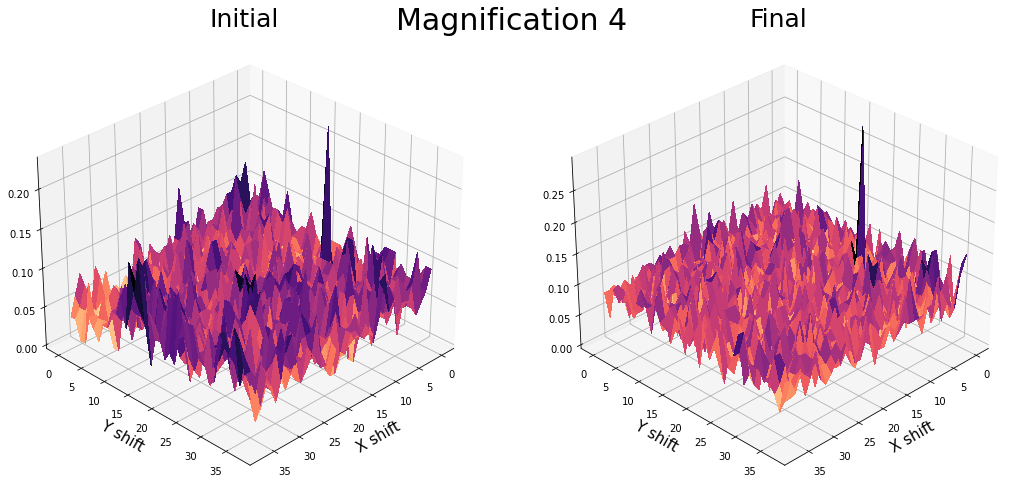

In [15]:
j = 725

fig, [ax, aax] = plt.subplots(1, 2, figsize=(15,7), subplot_kw={"projection": "3d"}, facecolor='white')

X = np.arange(metric_tester.corr_size)
Y = np.arange(metric_tester.corr_size)
X, Y = np.meshgrid(X, Y)
Za = test_init[j].reshape(metric_tester.corr_size,metric_tester.corr_size)
Zaa = test_final[j].reshape(metric_tester.corr_size,metric_tester.corr_size)

cmap = 'magma_r'
surf = ax.plot_surface(X, Y, Za, cmap=cmap, linewidth=0, antialiased=False)
ax.view_init(elev=30, azim=45)

ax.set_title('Initial', fontsize=25)

surf = aax.plot_surface(X, Y, Zaa, cmap=cmap, linewidth=0, antialiased=False)
aax.view_init(elev=30, azim=45)

aax.set_title('Final', fontsize=25)

ax.set_ylabel('Y shift', fontsize=15)
ax.set_xlabel('X shift', fontsize=15)
aax.set_ylabel('Y shift', fontsize=15)
aax.set_xlabel('X shift', fontsize=15)

plt.tight_layout()

plt.suptitle('Magnification {}'.format(i_magnification), fontsize=30)
# plt.colorbar(surf)
plt.show()

In [244]:
35**2//2

612

In [254]:
((metric_tester.corr_size)*(metric_tester.corr_size//2))-1+(metric_tester.corr_size//2)

684

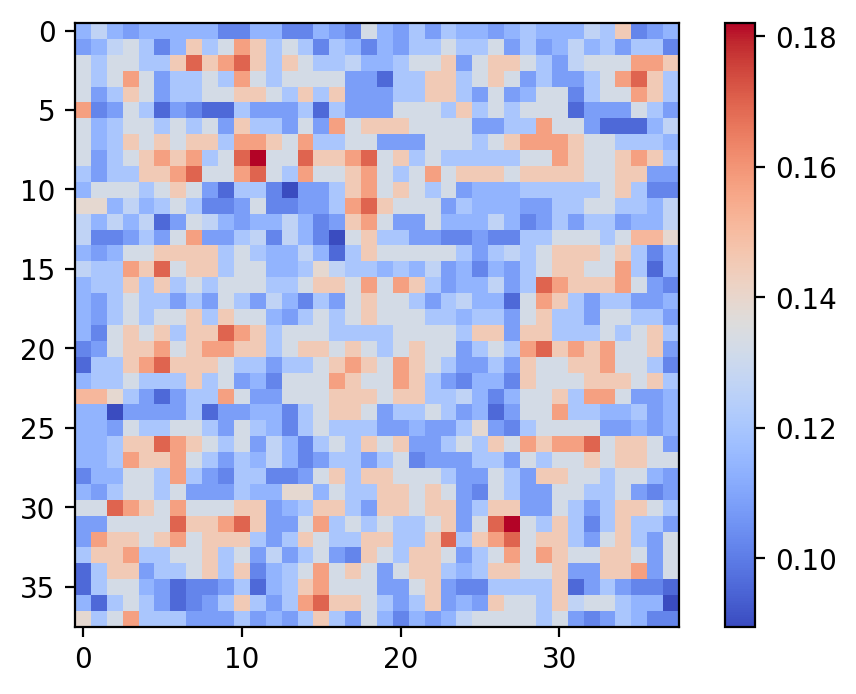

Mean diff: 0.018574858448665757
Std of diff: 0.015879420175837867


In [266]:
metric_tester.magnification = 4
metric_tester.remagnify()

metric_tester.mask = np.loadtxt(final_mask_fn)
test_mag = metric_tester.CalculateMetric(metric_tester.mask, return_F=True)

plt.figure(dpi=200)
plt.imshow(np.array([np.max(np.abs(np.delete(test_mag[ind], ind)-(i_open_frac**2))) 
                     for ind in range(test_mag.shape[0])]).reshape(
                            metric_tester.corr_size,metric_tester.corr_size),
          cmap='coolwarm')
plt.colorbar()
plt.show()

print('Mean diff: {}'.format(
np.mean(np.array([np.mean(np.delete(test_mag[ind], ind)-(i_open_frac**2)) 
                     for ind in range(test_mag.shape[0])]))))
print('Std of diff: {}'.format(
np.std(np.array([np.mean(np.delete(test_mag[ind], ind)-(i_open_frac**2)) 
                     for ind in range(test_mag.shape[0])]))))

In [27]:
seed_dir_new = 'GD_ms_46-of_5-mag_3.0-seed_1000-hl_50-cw_1.0-sw_2.0/'
data_dir_new = 'Optimizations/'
init_mask_fn_new = data_dir_new + seed_dir_new + init_mask_file
final_mask_fn_new = data_dir_new + seed_dir_new + final_mask_file

In [33]:
metric_tester.magnification = i_magnification
metric_tester.remagnify()

metric_tester.mask = np.loadtxt(init_mask_fn_new)
test_init = metric_tester.CalculateMetric(metric_tester.mask, return_F=True)
test_init_met = metric_tester.CalculateMetric(metric_tester.mask)

metric_tester.mask = np.loadtxt(final_mask_fn_new)
test_final = metric_tester.CalculateMetric(metric_tester.mask, return_F=True)
test_final_met = metric_tester.CalculateMetric(metric_tester.mask)

In [34]:
test_init_met

(0.021850871361911956, 13.651693877551036)

In [35]:
test_final_met

(0.007426673357883139, 1.3342379575177015)

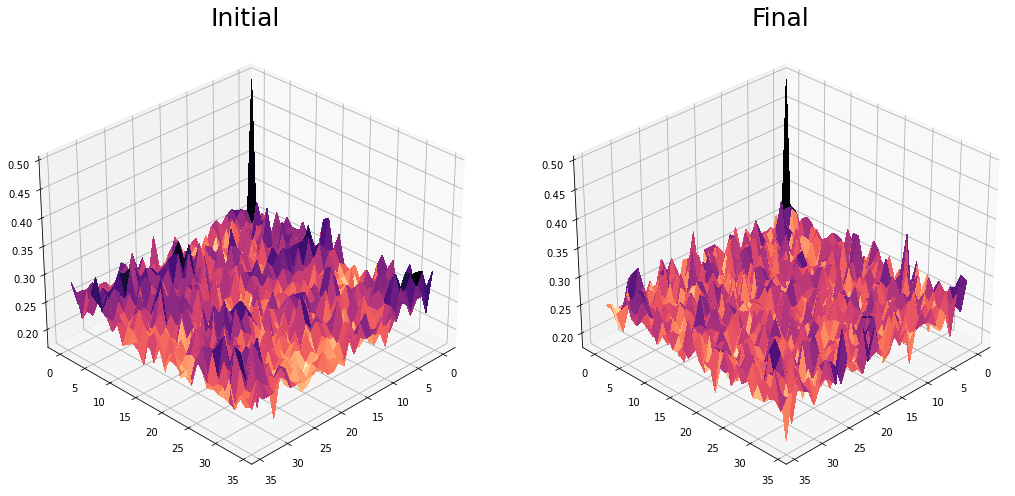

In [29]:
j = 0

fig, [ax, aax] = plt.subplots(1, 2, figsize=(15,7), subplot_kw={"projection": "3d"}, facecolor='white')

X = np.arange(metric_tester.corr_size)
Y = np.arange(metric_tester.corr_size)
X, Y = np.meshgrid(X, Y)
Za = test_init[j].reshape(metric_tester.corr_size,metric_tester.corr_size)
Zaa = test_final[j].reshape(metric_tester.corr_size,metric_tester.corr_size)

surf = ax.plot_surface(X, Y, Za, cmap='magma_r', linewidth=0, antialiased=False)
ax.view_init(elev=30, azim=45)

ax.set_title('Initial', fontsize=25)

surf = aax.plot_surface(X, Y, Zaa, cmap='magma_r', linewidth=0, antialiased=False)
aax.view_init(elev=30, azim=45)

aax.set_title('Final', fontsize=25)

# ax.set_ylabel('Y', fontsize=20)
# ax.set_xlabel('X', fontsize=20)
plt.tight_layout()

plt.show()

In [144]:
metric_tester.mask[0:metric_tester.sample_size, 0:metric_tester.sample_size]

array([[0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1.,
        0., 0.],
       [0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0.,
        0., 1.],
       [1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1.,
        0., 0.],
       [1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 1., 0.,
        0., 1.],
       [0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0.,
        1., 1.],
       [0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1.,
        0., 1.],
       [1., 0., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1.,
        1., 0.],
       [0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0.,
        1., 1.],
       [1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0.,
        0., 0.],
       [0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1.,
        0., 1.],
       [1., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 0., 0.,
        1., 0.],
       [1., 1., 1., 0

In [142]:
signal.correlate2d(metric_tester.mask, 
                   metric_tester.mask[0:metric_tester.sample_size, 0:metric_tester.sample_size], mode='valid')

array([[157.,  62.,  79.,  77.,  78.,  72.,  79.,  90.,  69.,  78.,  78.,
         85.,  77.,  84.,  79.,  71.,  86.,  74.,  89.,  74.,  85.,  68.,
         83.,  81.,  83.,  85.,  74.,  75.,  74.],
       [ 75.,  72.,  69.,  77.,  72.,  83.,  77.,  85.,  79.,  77.,  89.,
         64.,  84.,  80.,  76.,  74.,  80.,  82.,  82.,  83.,  86.,  79.,
         78.,  74.,  75.,  76.,  80.,  85.,  78.],
       [ 69.,  87.,  76.,  77.,  82.,  79.,  81.,  71.,  81.,  79.,  79.,
         81.,  86.,  75.,  75.,  79.,  83.,  80.,  75.,  83.,  78.,  72.,
         78.,  86.,  76.,  84.,  76.,  79.,  77.],
       [ 70.,  77.,  75.,  77.,  84.,  80.,  85.,  78.,  77.,  84.,  84.,
         77.,  69.,  80.,  78.,  82.,  76.,  79.,  82.,  77.,  87.,  84.,
         78.,  76.,  77.,  81.,  81.,  79.,  74.],
       [ 71.,  78.,  75.,  81.,  77.,  85.,  81.,  79.,  81.,  84.,  81.,
         81.,  71.,  79.,  79.,  80.,  78.,  86.,  77.,  79.,  82.,  78.,
         81.,  87.,  78.,  67.,  72.,  80.,  82.],
     

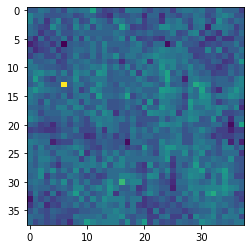

In [26]:
plt.imshow(test[500].reshape(38,38))
plt.show()

In [11]:
test.mask

array([[1., 1., 1., ..., 1., 1., 0.],
       [0., 1., 1., ..., 1., 1., 1.],
       [1., 0., 0., ..., 0., 1., 1.],
       ...,
       [1., 1., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 1., 1., 1.],
       [1., 1., 0., ..., 1., 1., 1.]])

In [33]:
fm = 'Optimizations/GD_ms_46-ff_45-mag_4.0-seed_131-hl_100-cw_1.0-sw_2.0/final_mask.txt'

In [35]:
tm = np.loadtxt(fm)

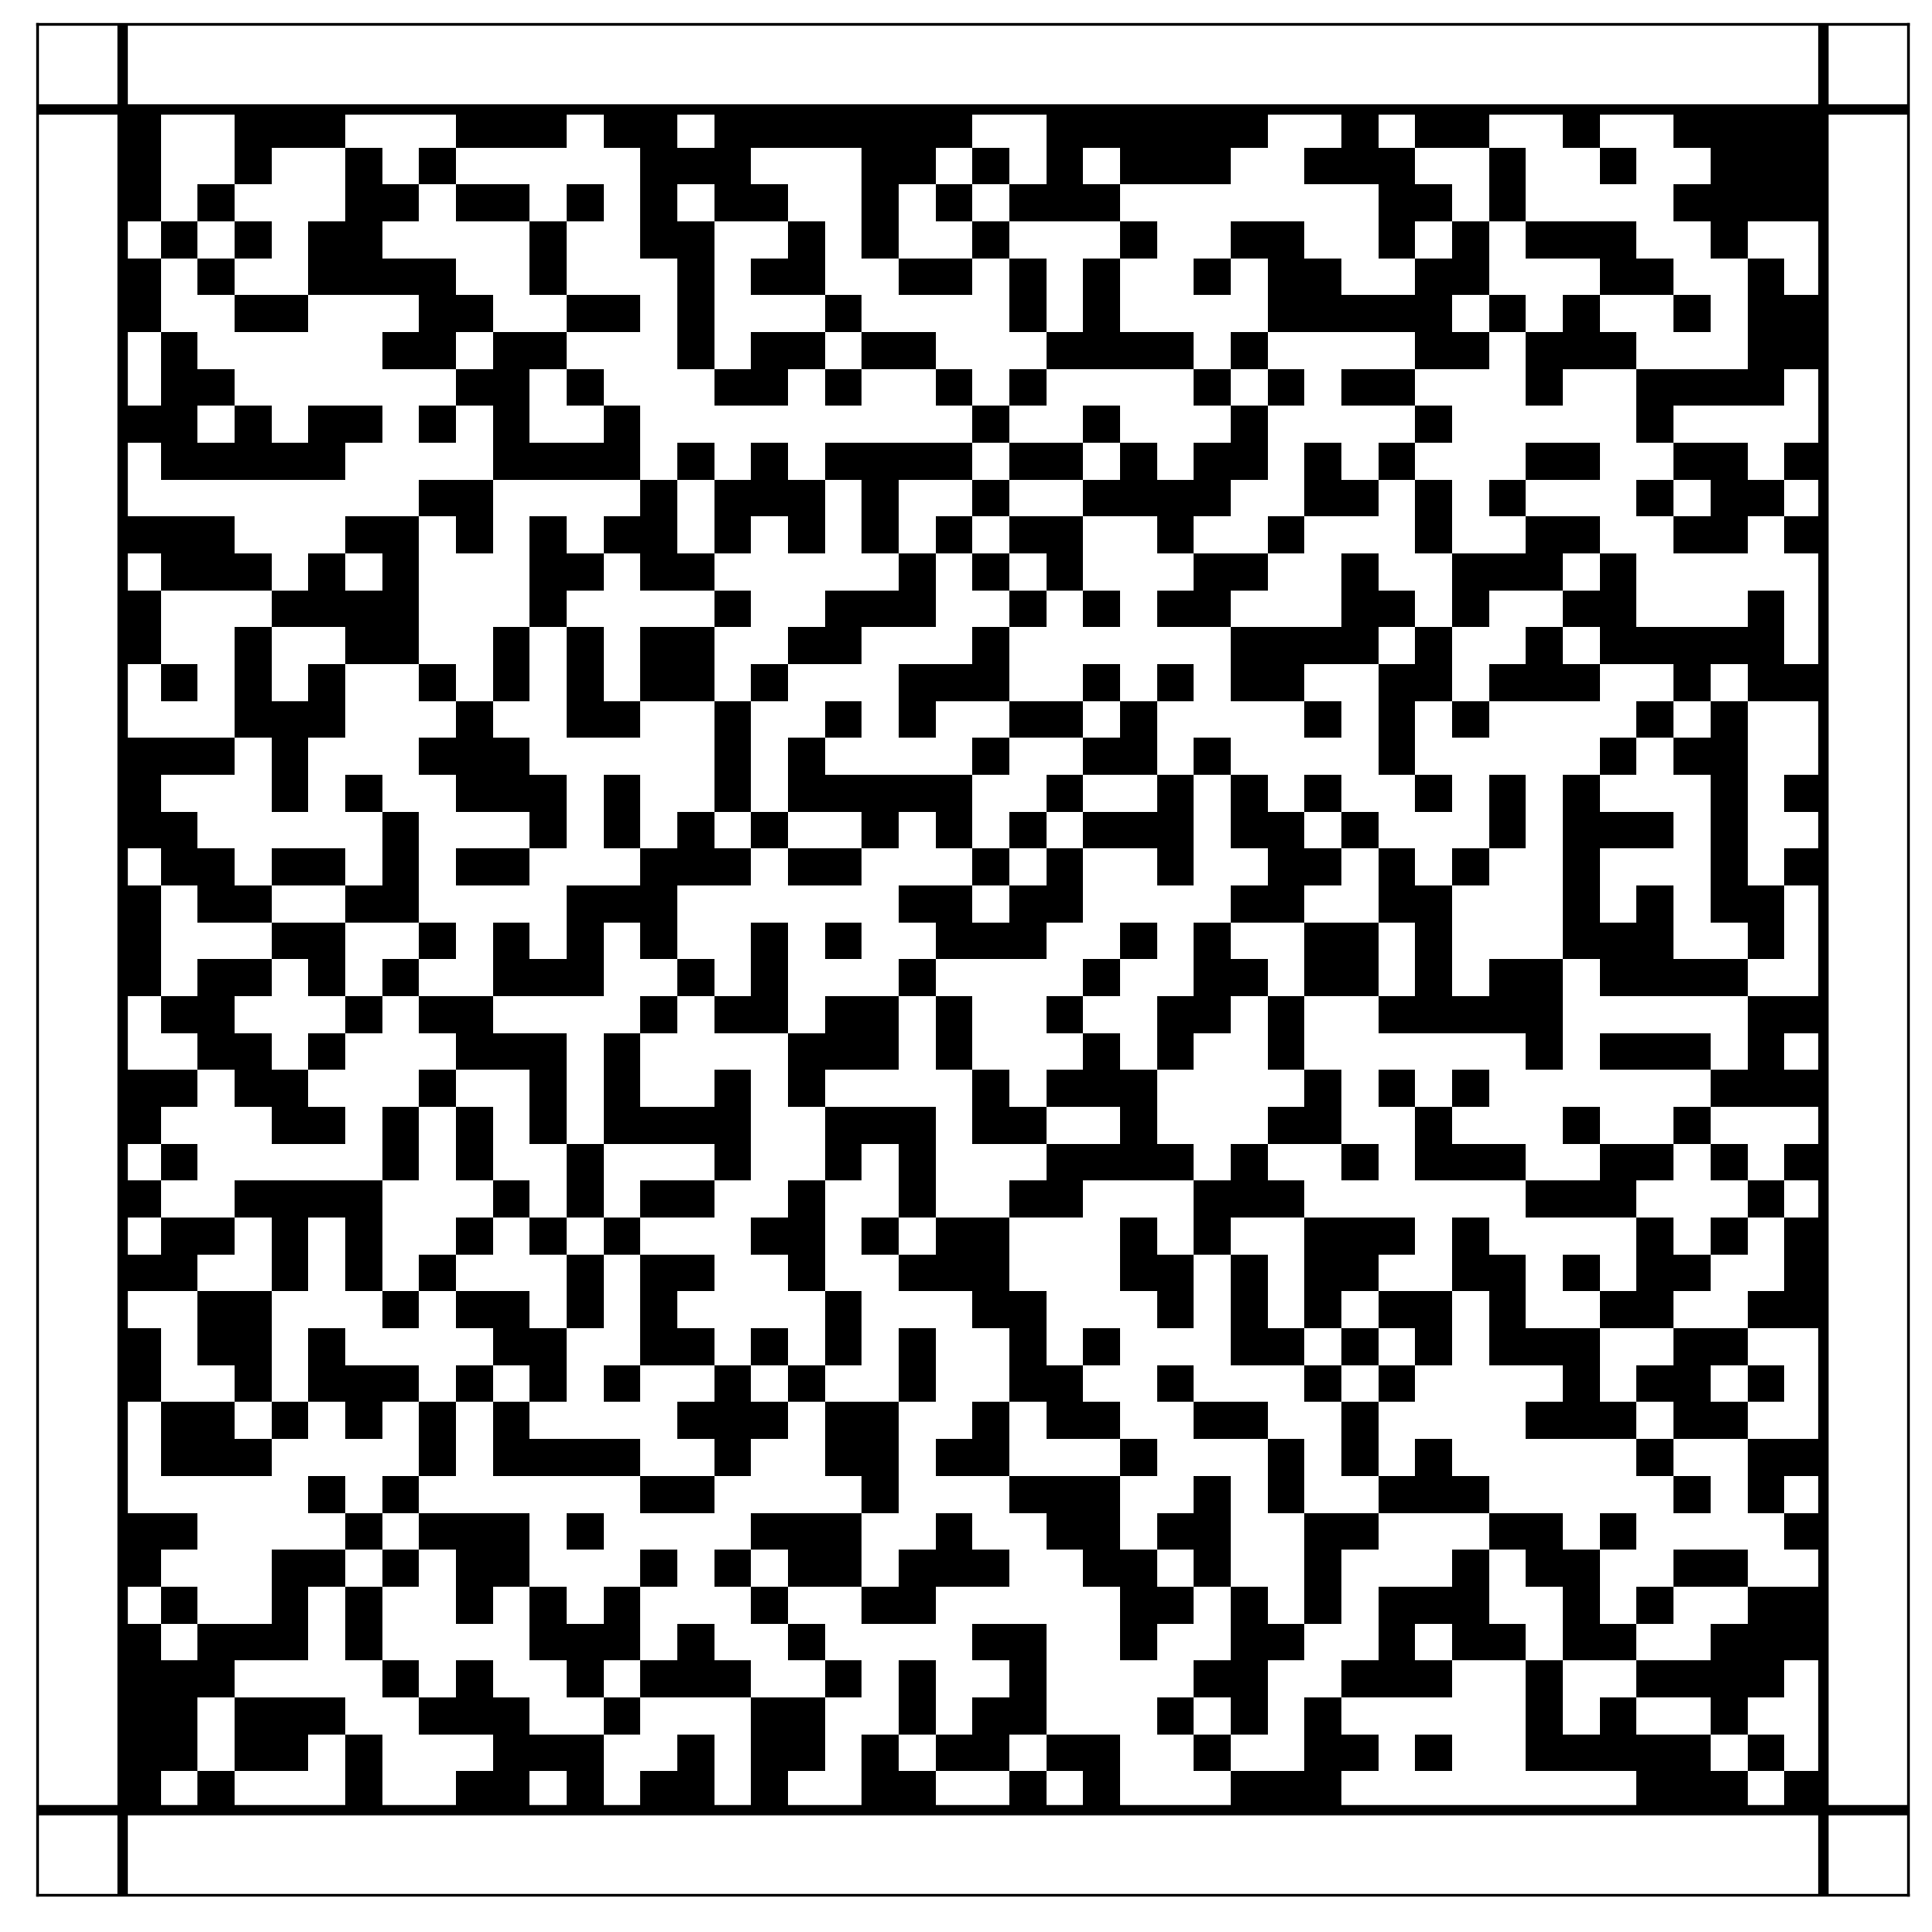

In [57]:
plt.figure(figsize=(10,10), facecolor='white', dpi=300)
plt.imshow(tm, cmap='binary_r')
plt.xticks([])
plt.yticks([])
plt.axvline(-0.55, linewidth=3, color='black')
plt.axvline(45.55, linewidth=3, color='black')
plt.axhline(45.55, linewidth=3, color='black')
plt.axhline(-0.55, linewidth=3, color='black')
plt.savefig('Plots/test_mask.png', bbox_inches='tight')
plt.show()

In [58]:
metric_tester = OptimizerClass(initialize = False)
metric_tester.plots_dir = 'Optimizations-Desktop/Plots/'

In [73]:
fi = data_dir+'GD_ms_46-of_5-mag_4-seed_76-hl_80-cw_1.0-sw_1.0-ft_0.6/'+init_mask_file

In [62]:
np.loadtxt(fi)

array([[  0.,   0.,   0., ...,   0.,   0.,   0.],
       [ 43.,   0.,  59., ..., 110., 292.,   0.],
       [ 43.,  43., 118., ...,   0., 292.,   0.],
       ...,
       [ 60.,  60.,   0., ..., 244., 244.,   0.],
       [ 60.,   0., 172., ..., 244., 244.,   0.],
       [192., 192., 192., ..., 244.,   0.,   0.]])

In [74]:
tm = np.loadtxt(fi)

In [75]:
tm = np.where(tm == 0, 0, 1)

In [67]:
tm

array([[0, 0, 0, ..., 0, 0, 0],
       [1, 0, 1, ..., 1, 1, 0],
       [1, 1, 1, ..., 0, 1, 0],
       ...,
       [1, 1, 0, ..., 1, 1, 0],
       [1, 0, 1, ..., 1, 1, 0],
       [1, 1, 1, ..., 1, 0, 0]])

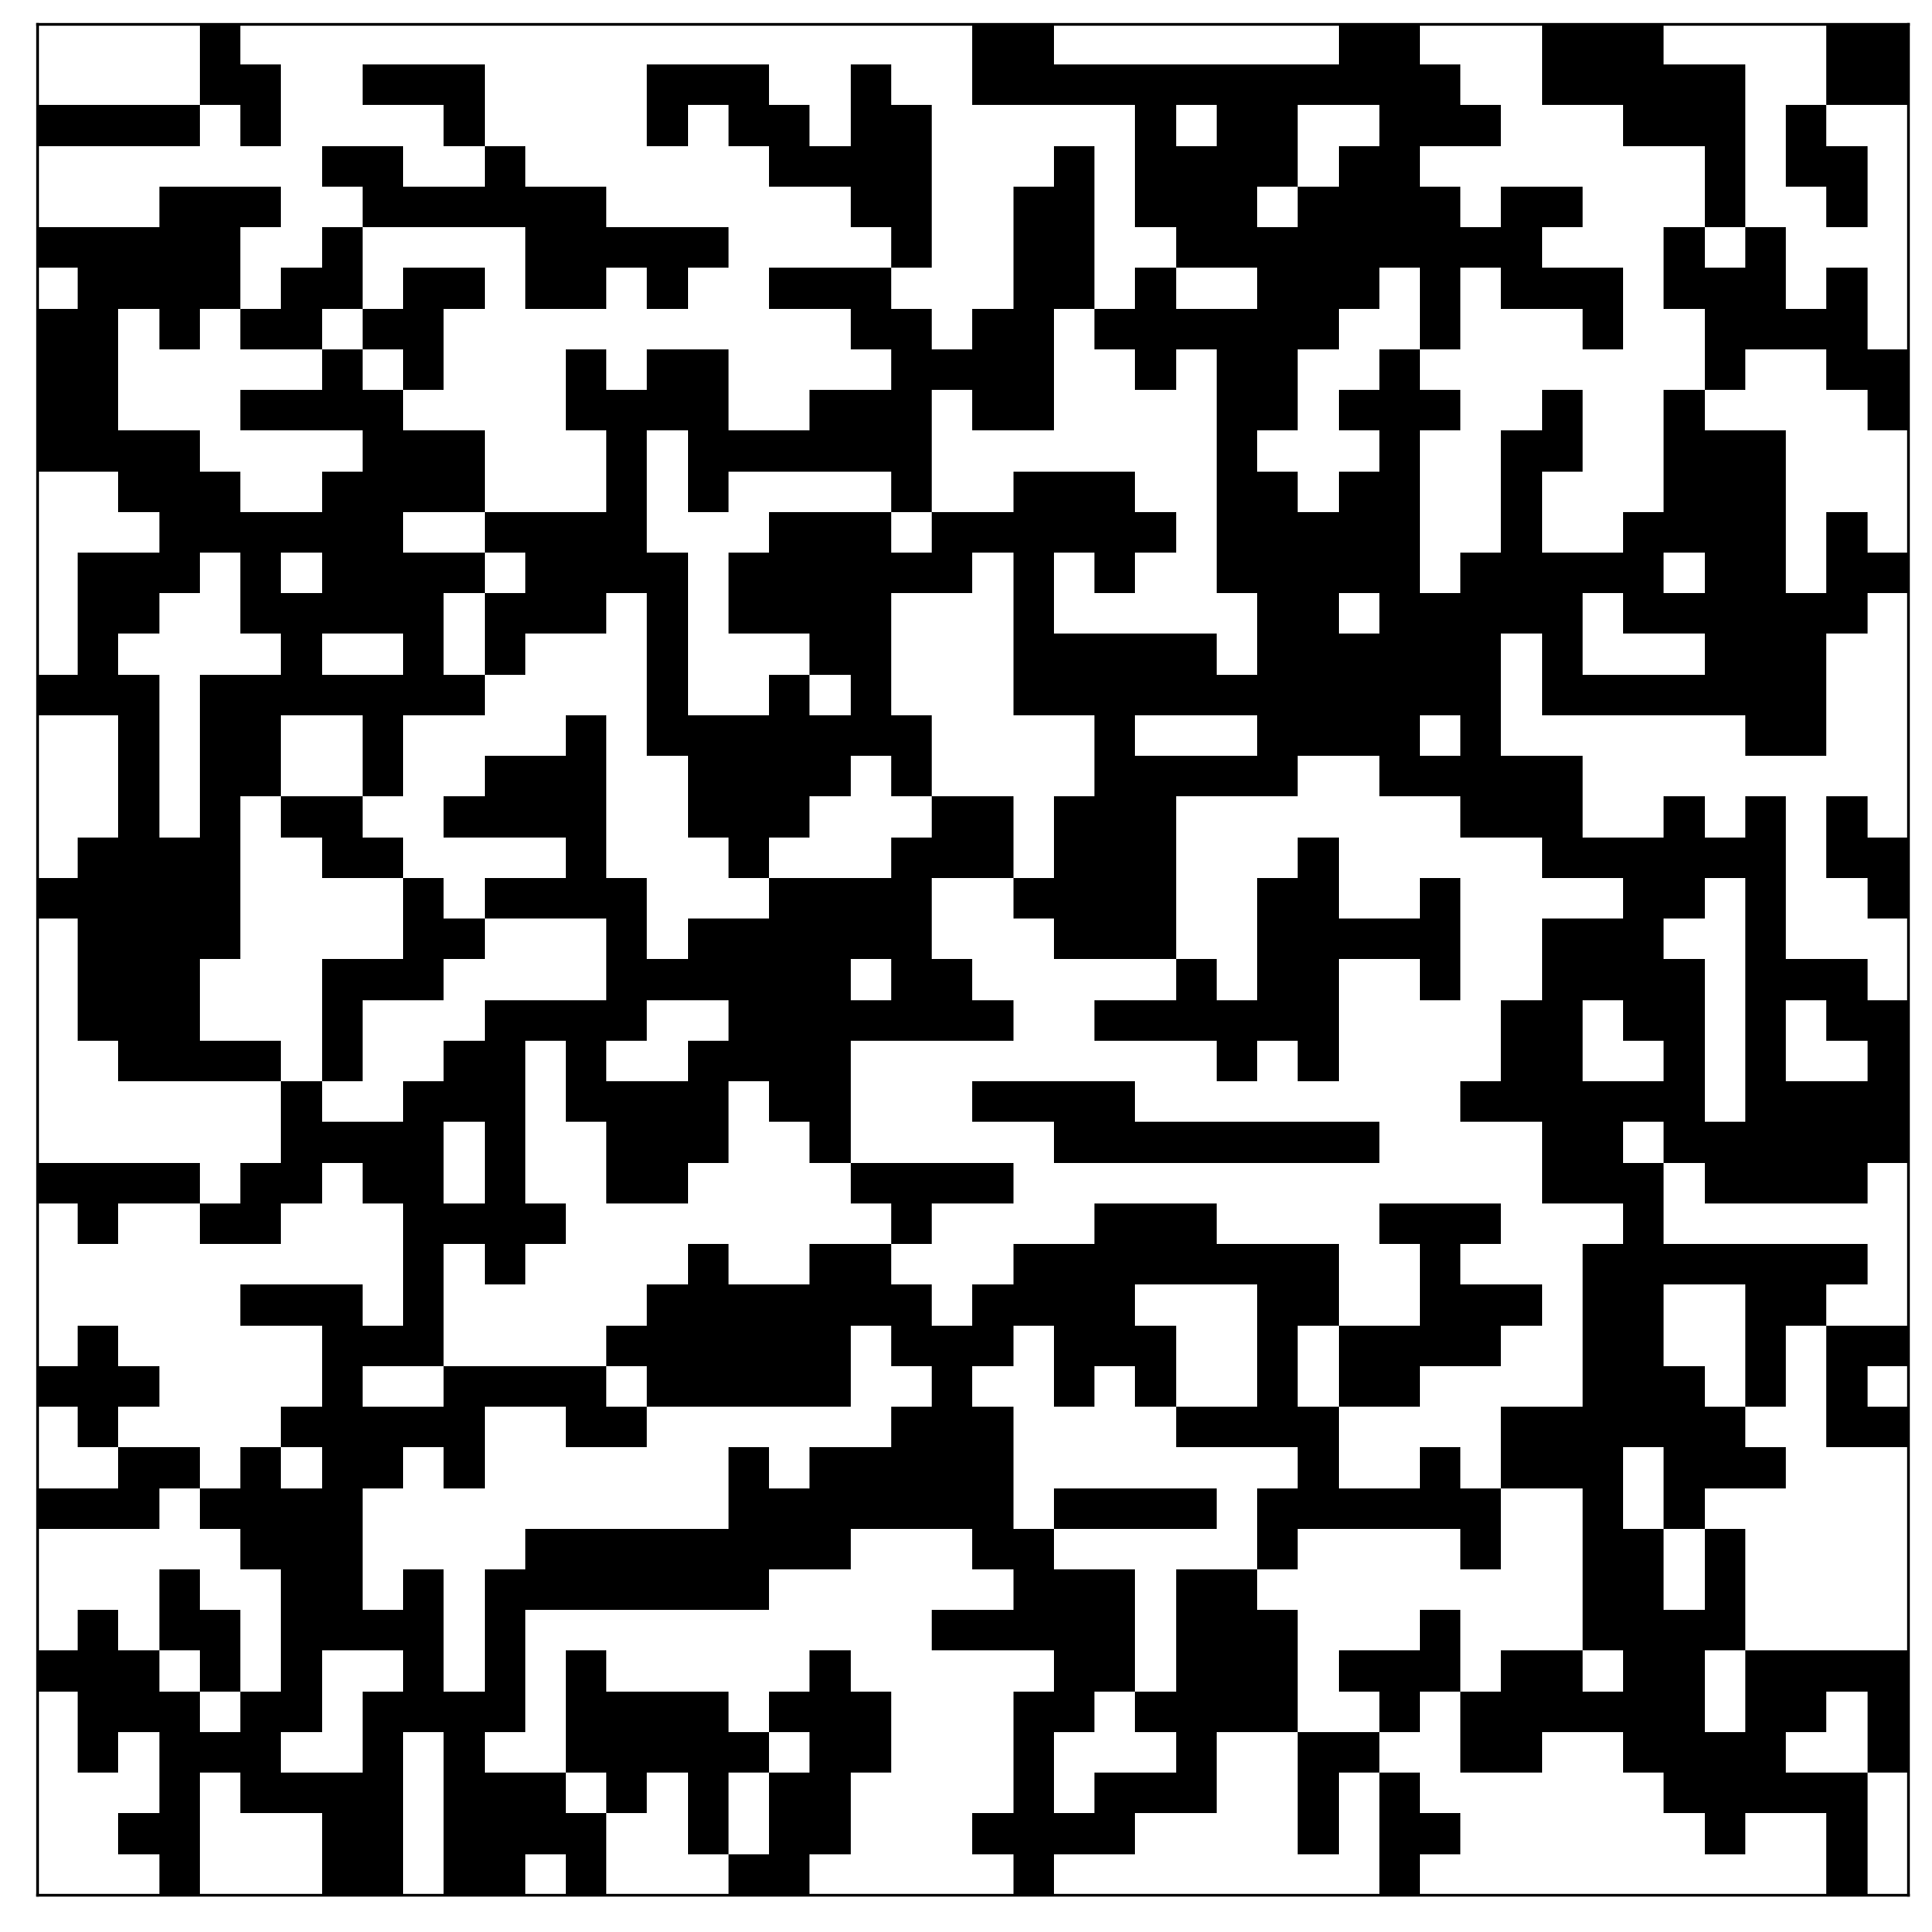

In [77]:
plt.figure(figsize=(10,10), facecolor='white', dpi=300)
plt.imshow(tm, cmap='binary')
plt.xticks([])
plt.yticks([])

plt.savefig('Plots/seed_76_initial_bw.png', bbox_inches='tight')
plt.show()